# Carregamento dos dados e bibliotecas

In [129]:
! pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [130]:

from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.datasets import fetch_openml 
from scipy.stats import ttest_ind
import missingno as msno
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

In [131]:
warnings.filterwarnings('always') 
warnings.filterwarnings('ignore') 

style.use('fivethirtyeight')  # Estilo de plotagem
# Configurações de estilo para Seaborn
sns.set(style='whitegrid', color_codes=True)

In [132]:
df=pd.read_csv('analise_vinho_tinto.csv')

In [133]:
df = df.iloc[:, 1:]

In [134]:
df.shape

(1599, 12)

In [135]:
df.columns

Index(['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
       'cloreto', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
       'densidade', 'pH', 'sulfatos', 'alcool', 'qualidade'],
      dtype='object')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acidez_fixa            1599 non-null   float64
 1   acidez_volatil         1599 non-null   float64
 2   acido_citrico          1599 non-null   float64
 3   acucar_residual        1599 non-null   float64
 4   cloreto                1599 non-null   float64
 5   dioxido_enxofre_livre  1599 non-null   float64
 6   dioxido_enxofre_total  1599 non-null   float64
 7   densidade              1599 non-null   float64
 8   pH                     1599 non-null   float64
 9   sulfatos               1599 non-null   float64
 10  alcool                 1599 non-null   float64
 11  qualidade              1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [137]:
df.isnull().sum()

acidez_fixa              0
acidez_volatil           0
acido_citrico            0
acucar_residual          0
cloreto                  0
dioxido_enxofre_livre    0
dioxido_enxofre_total    0
densidade                0
pH                       0
sulfatos                 0
alcool                   0
qualidade                0
dtype: int64

# 1. Análise Exploratória das variáveis

## Análise de Correlação das Características da Qualidade do Vinho

Através da aplicação das técnicas de correlação de Pearson e Spearman, podemos discernir as características que mais influenciam a qualidade do vinho. Os resultados indicam que as variáveis de álcool e densidade apresentam as maiores correlações. A análise de Spearman ainda revela o cloreto como uma variável com significativa correlação, enquanto a análise de Pearson destaca a acidez volátil. É fundamental notar, no entanto, que nenhuma dessas correlações ultrapassa o limiar de 0,5, sugerindo uma relação moderada entre as características e a qualidade do vinho.

Explorando as características de menor correlação, observamos que, em ambos os conjuntos de dados, o açúcar residual exibe a menor correlação. Além disso, na análise de Spearman, os sulfatos demonstram uma correlação fraca, enquanto na análise de Pearson, o pH é a variável com a correlação mais baixa.

Essas descobertas fornecem insights valiosos sobre os fatores que afetam a qualidade do vinho, informando futuras investigações e aprimorando nossa compreensão das relações entre as características químicas e organolépticas dessa bebida apreciada.

<Axes: >

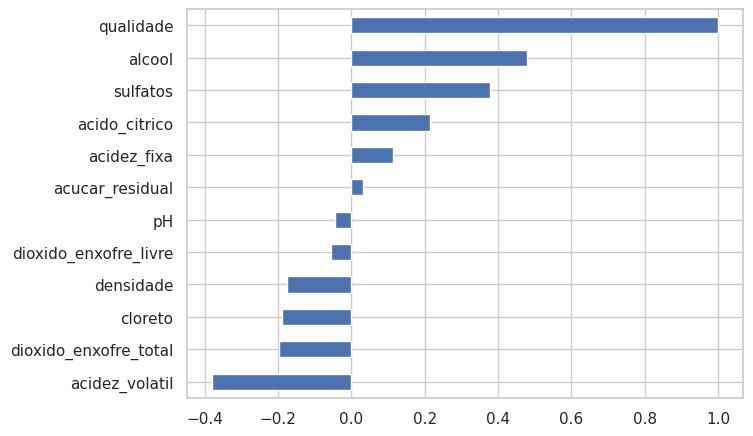

In [138]:
df.corr(method="spearman", numeric_only=True)[
    'qualidade'].sort_values().plot(kind='barh')


<Axes: >

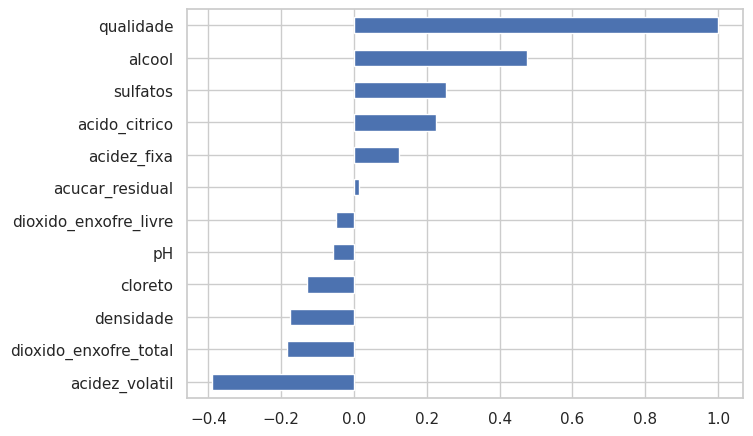

In [139]:
df.corr(method="pearson", numeric_only=True)[
    'qualidade'].sort_values().plot(kind='barh')


## Análise de Relação entre Teor Alcoólico de Vinhos e Qualidade

Nesta análise, investigamos a relação entre a pontuação de vinhos e seu teor alcoólico. Os resultados revelam uma tendência notável: vinhos com classificação superior (9) tendem a apresentar teores alcoólicos mais elevados. No entanto, é crucial observar que a presença de um alto teor alcoólico não é, por si só, um indicativo infalível de qualidade, visto que identificamos casos atípicos de vinhos com uma pontuação de 5 que exibem elevado teor alcoólico.


<Axes: xlabel='qualidade', ylabel='alcool'>

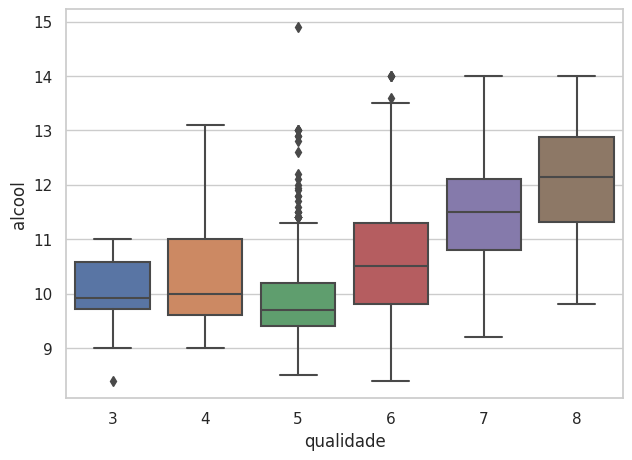

In [140]:
sns.boxplot(data = df,
           x = "qualidade",
           y = "alcool")

<Axes: xlabel='alcool', ylabel='Density'>

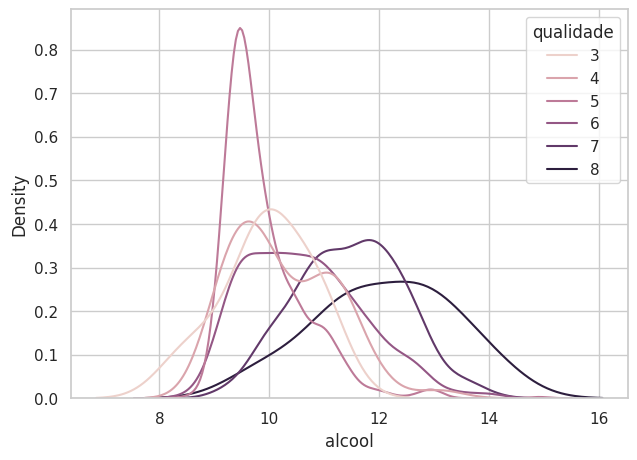

In [141]:
sns.kdeplot(data = df,
           x = "alcool",
           hue = "qualidade",
           common_norm = False)

## Análise das Relações entre Classificação de Vinhos e Teor Alcoólico

Neste estudo, exploramos as relações entre a classificação de vinhos e seu teor alcoólico com base em dados empíricos. O gráfico apresentado acima ilustra as conclusões extraídas dessa análise.

## Resultados da Análise

O gráfico confirma de forma convincente a existência de uma correlação entre a classificação dos vinhos e seu teor alcoólico. Em particular, destacamos as seguintes descobertas:

- Vinhos com classificações mais elevadas, variando entre 7 e 9, exibem um teor alcoólico superior. Isso é evidenciado pela presença de um pico notável na densidade de amostras de vinho, concentrado entre 11 e 13 graus de álcool.

- Por outro lado, os vinhos com classificações mais baixas apresentam uma densidade de amostras mais significativa em uma faixa de graduação alcoólica entre 9 e 10.

Esses resultados sugerem que o teor alcoólico pode ser um fator relevante na classificação de vinhos, com vinhos mais alcoólicos geralmente recebendo classificações mais altas. Essa associação entre classificação e teor alcoólico pode ser de interesse para produtores, apreciadores e entusiastas de vinho que desejam compreender melhor os fatores subjacentes à apreciação de vinhos.

É importante notar que essa análise se baseia em dados disponíveis e pode não capturar todas as nuances do mundo dos vinhos. No entanto, os resultados aqui apresentados oferecem uma visão valiosa das relações entre classificação de vinhos e teor alcoólico, proporcionando um ponto de partida para investigações mais aprofundadas e tomada de decisões informadas.


## Análise univariada

In [142]:
df.describe(include='all')

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloreto,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfatos,alcool,qualidade
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Histogramas das features

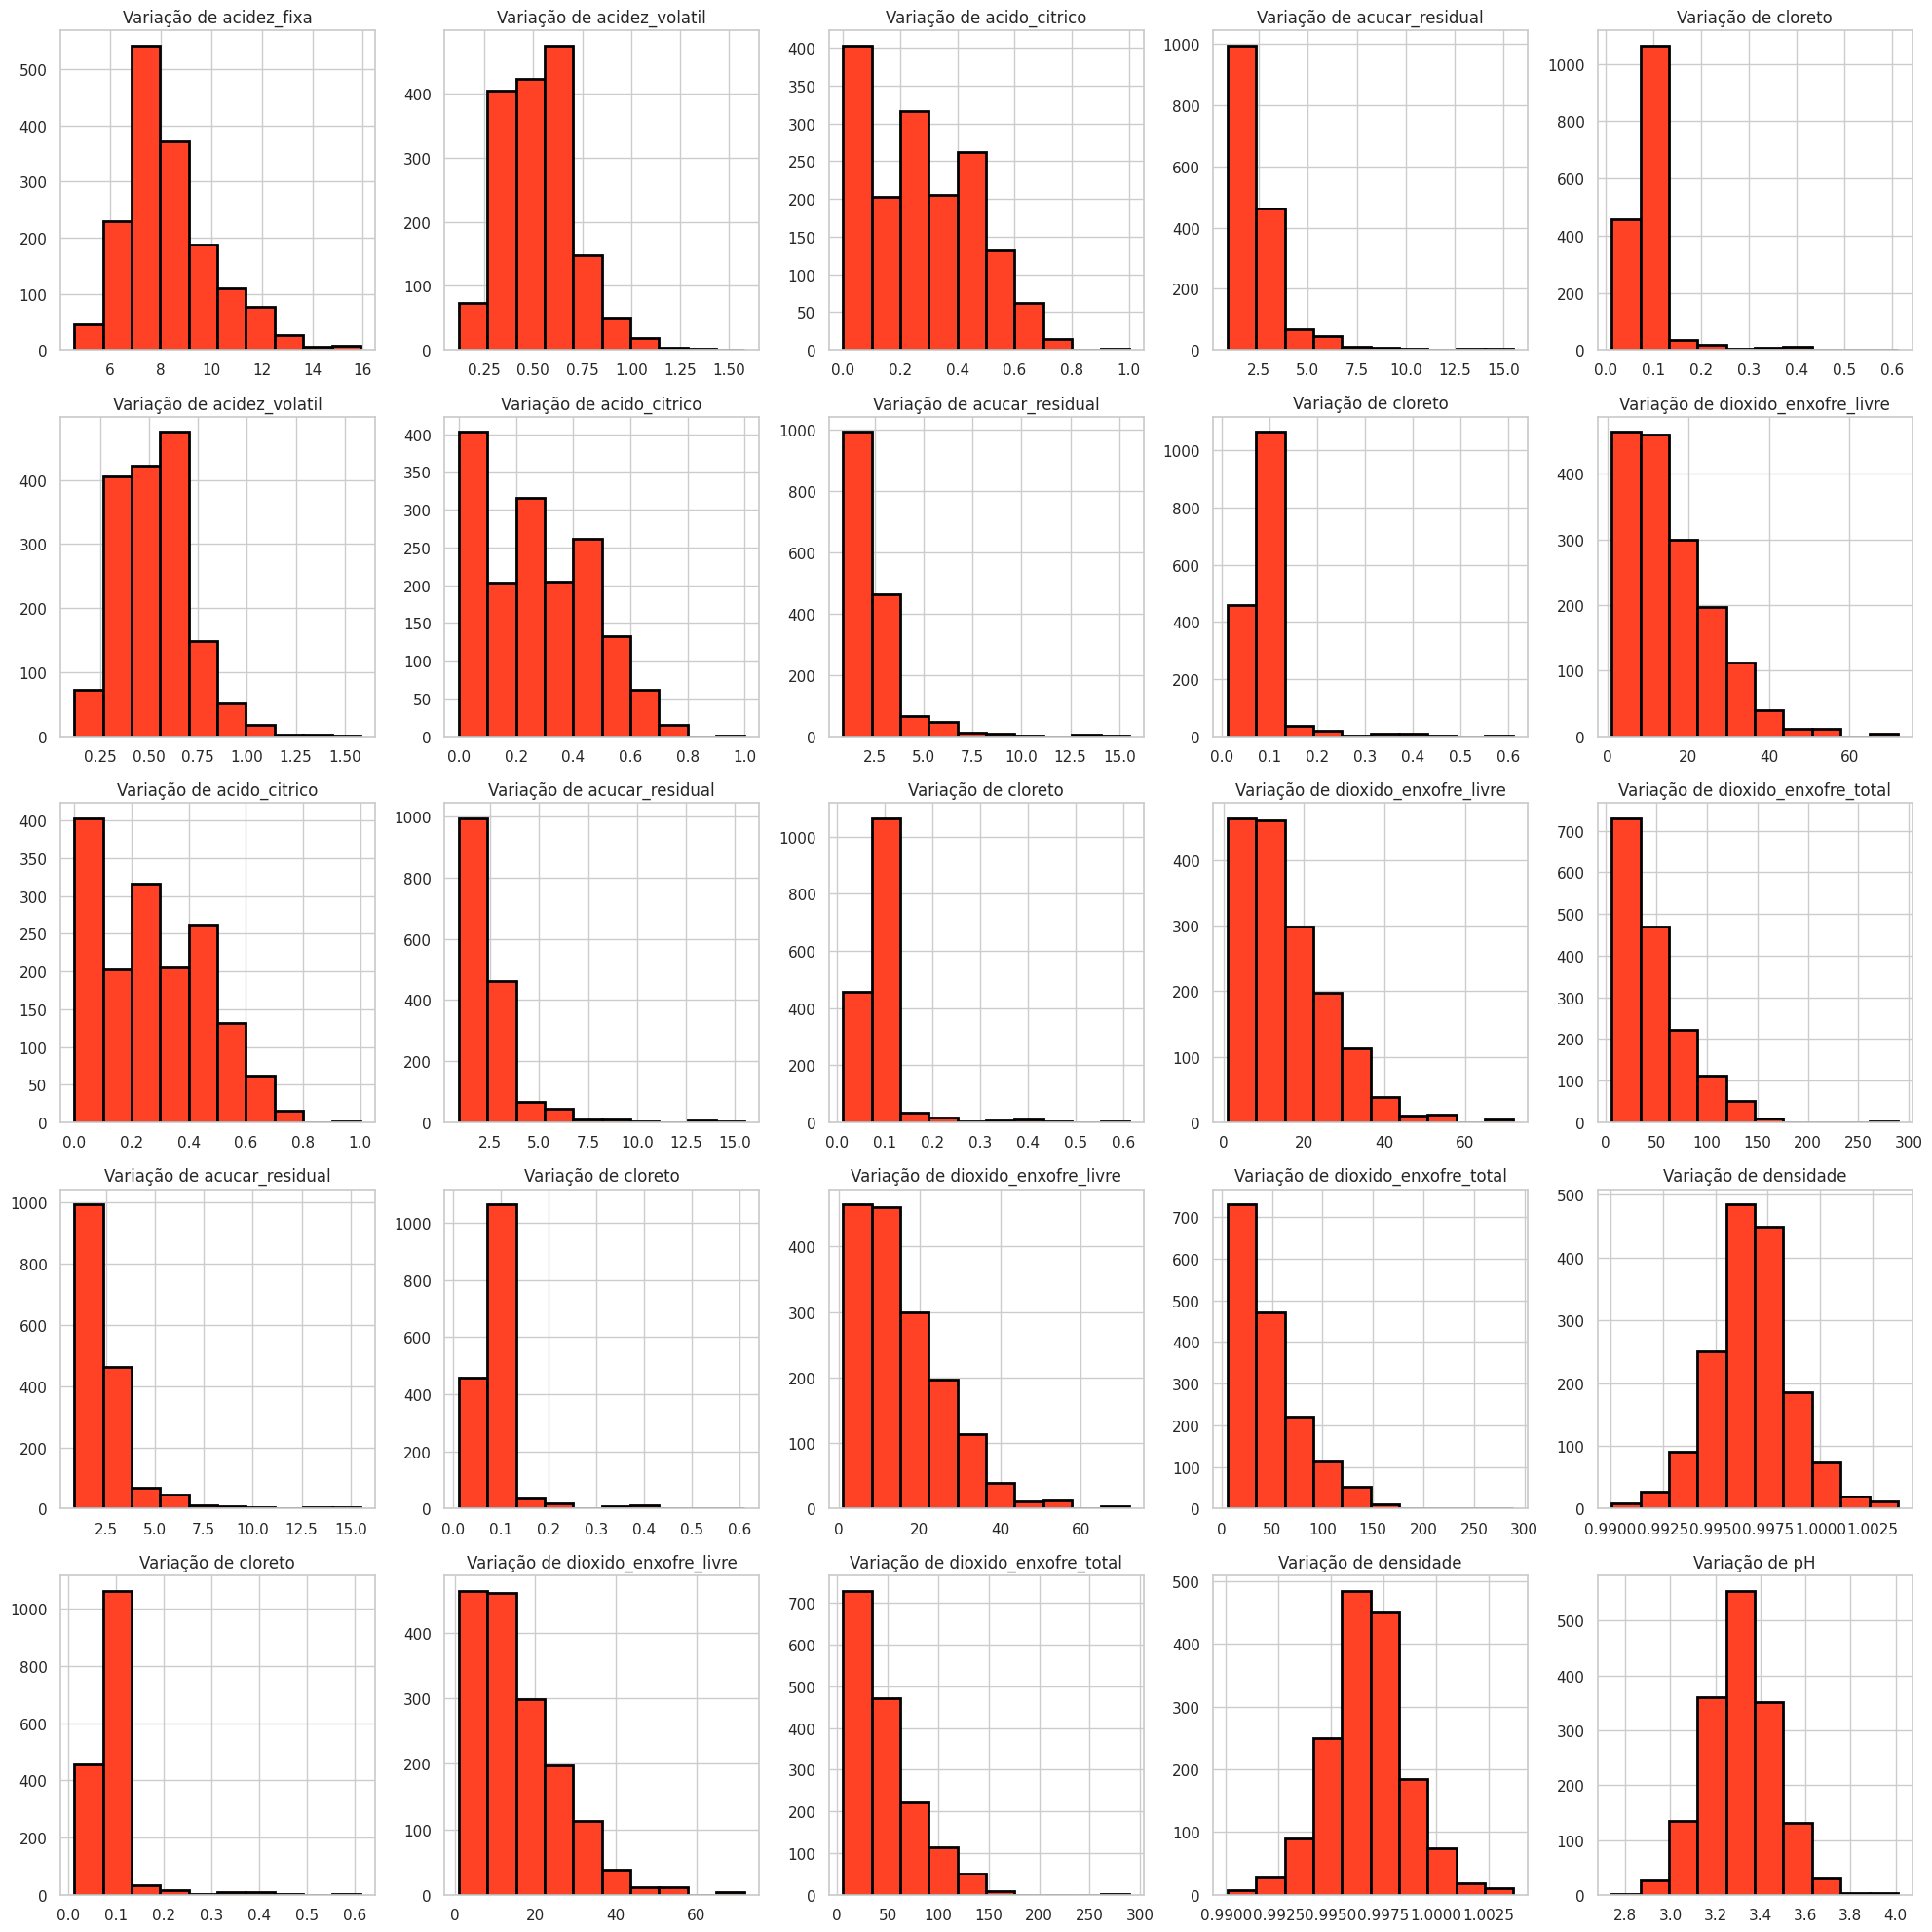

In [143]:
fig, axes = plt.subplots(5, 5)
colunas = ['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
           'cloreto', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
           'densidade', 'pH', 'sulfatos', 'alcool', 'qualidade']
for i in range(5):
    for j in range(5):
        axes[i, j].hist(x=colunas[i + j], data=df,
                        edgecolor='#000000', linewidth=2, color='#ff4125')
        axes[i, j].set_title('Variação de ' + colunas[i + j])
fig = plt.gcf()
fig.set_size_inches(20, 20)
fig.tight_layout()


## Correlação entre as features usando um mapa de correlação

<Axes: >

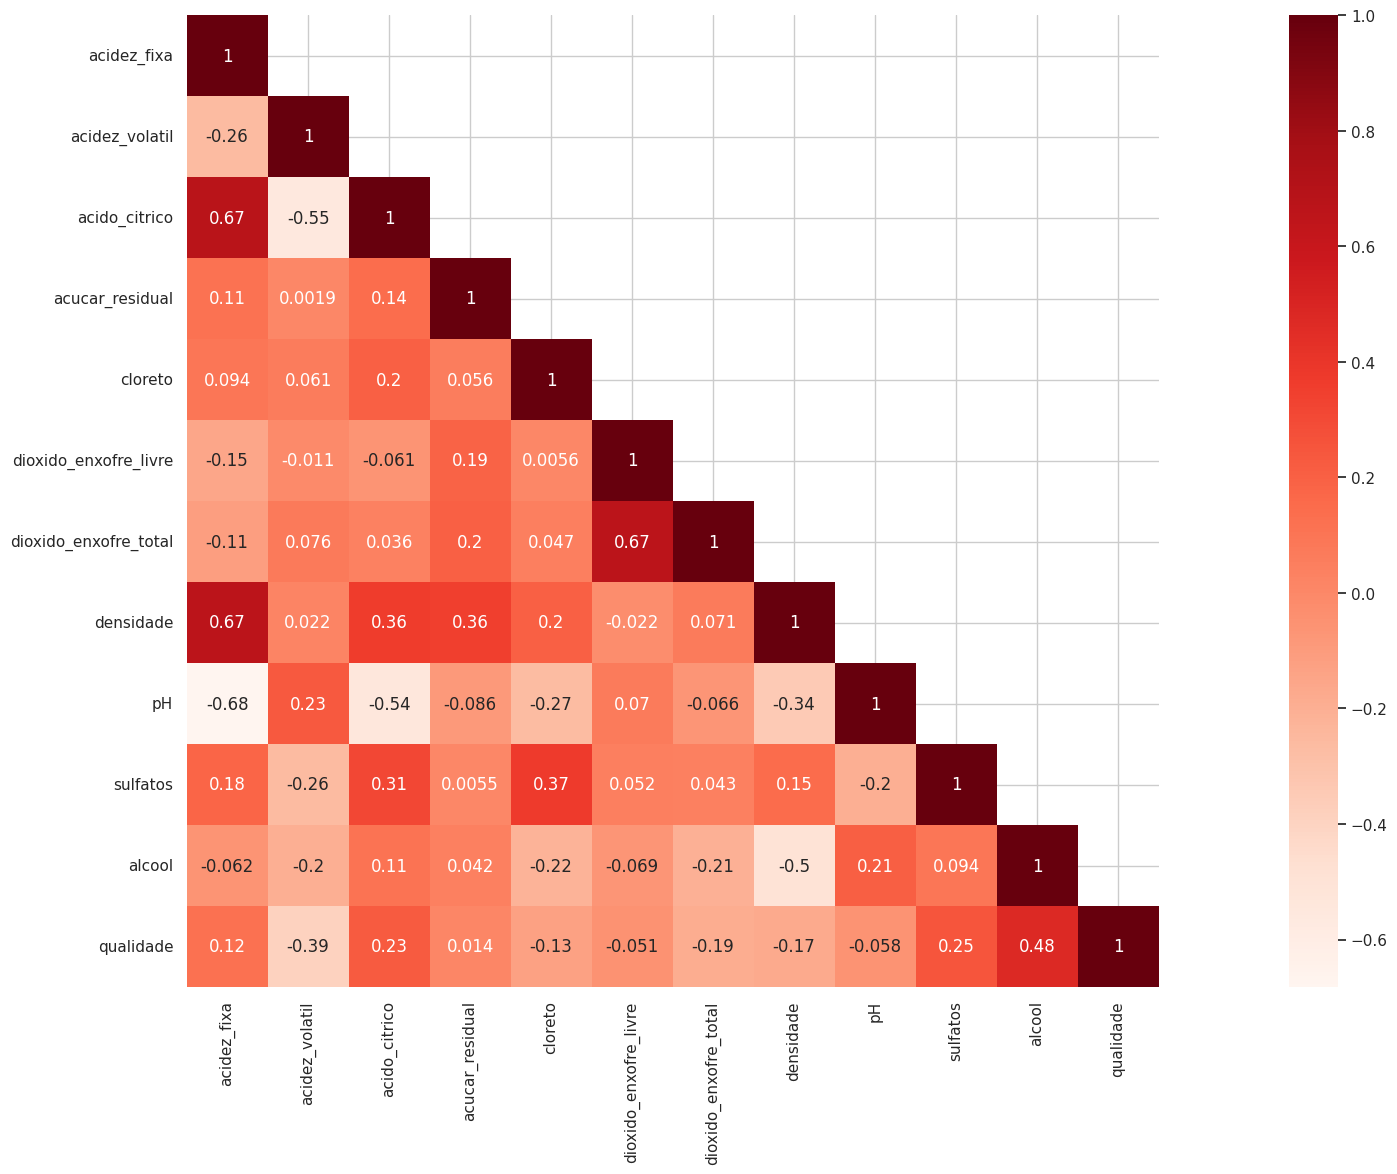

In [144]:
matriz_correlacao = df.corr()
mascara = np.array(matriz_correlacao)
mascara[np.tril_indices_from(mascara)] = False
figura = plt.gcf()
figura.set_size_inches(30, 12)
sns.heatmap(data=matriz_correlacao, mask=mascara,
            square=True, annot=True, cbar=True, cmap="Reds")


**INFERÊNCIAS DO MAPA DE CALOR ACIMA:**

1. A qualidade do vinho está altamente relacionada à acidez volátil.

2. Além disso, a qualidade do vinho está altamente correlacionada com o teor alcoólico.

3. O pH e o ácido cítrico/ acidez fixa estão altamente inversamente relacionados, pois todos sabemos que os ácidos têm valores de pH menores.

4. A relação consigo mesma (ou seja, de uma característica consigo mesma) é igual a 1, como esperado.

5. Outras inferências semelhantes podem ser feitas.

Agora é possível visualizar a variação da qualidade em relação a distintos atributos numéricos.


A função cria e exibe três gráficos em uma única chamada, usando os parâmetros fornecidos. É útil quando desejar visualizar diferentes aspectos da relação entre duas variáveis em um conjunto de dados.

In [145]:
def plot(feature_x, target='qualidade'):
    sns.catplot(x=target, y=feature_x, data=df, kind='bar', height=5, aspect=1)
    sns.catplot(x=target, y=feature_x, data=df, kind='violin', height=5, aspect=1)
    sns.catplot(x=target, y=feature_x, data=df, kind='swarm', height=5, aspect=1)

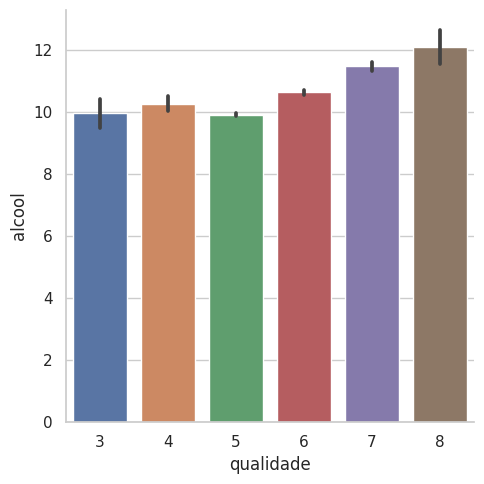

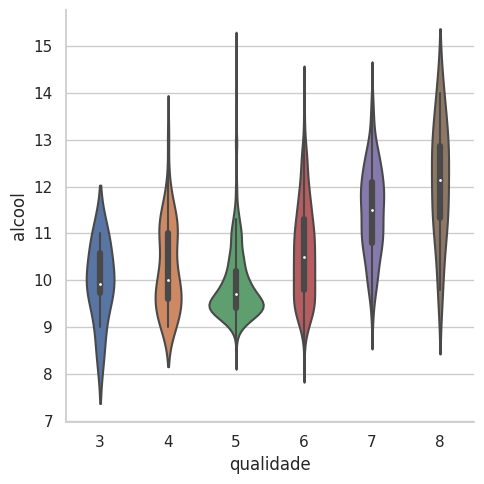

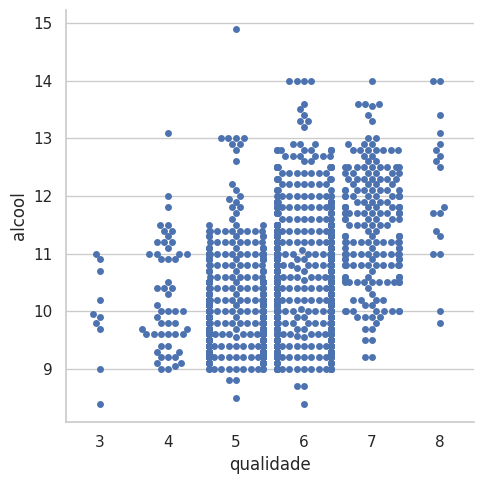

In [146]:
plot('alcool','qualidade')

# Modelagem de Dados


 Uma explicação sucinta sobre o LabelEncoder: Esta classe, parte da biblioteca scikit-learn (sklearn), é amplamente empregada para converter rótulos (categorias) em variáveis categóricas em valores numéricos. Essa conversão é essencial ao treinar modelos de aprendizado de máquina que exigem entradas numéricas em vez de categóricas. Por exemplo, permite transformar rótulos de classes, como "ruim" e "bom", em valores 0 e 1, tornando-os adequados como entradas para modelos de machine learning.

In [147]:
intervalos = (2, 6.5, 8)
nomes_grupos = ['ruim', 'bom']
df['qualidade'] = pd.cut(df['qualidade'], bins=intervalos, labels=nomes_grupos)

In [148]:
codificador_rotulos = LabelEncoder()

In [149]:
df['qualidade'] = codificador_rotulos.fit_transform(df['qualidade'])


## Comparação entre os modelos de classificação através de métricas de desempenho.

**Divisão de Dados para Treinamento e Teste:**

Este código divide um conjunto de dados em duas partes: uma para treinar um modelo de machine learning (conjunto de treinamento) e outra para testar o modelo (conjunto de teste). Ele separa as características do conjunto de destino (rótulos) e permite avaliar o desempenho do modelo ao usar dados que não foram usados no treinamento.

As métricas utilizadas são a acurácia, a precisão, o recall e o F1-Score. Elas desempenham papéis fundamentais na avaliação de modelos de classificação, cada um fornecendo insights valiosos sobre o desempenho do modelo.

Enquanto a acurácia mede a proporção de previsões corretas em relação ao total de previsões, ela pode ser enganosa em cenários desequilibrados, nos quais uma classe é muito mais prevalente que a outra, como é o caso deste DataSet.Nesses casos, um modelo tende a favorecer a classe majoritária e a acurácia pode ser alta, mas a capacidade de identificar a classe minoritária é inadequada.

A precisão mensura a proporção de previsões positivas corretas em relação ao total de previsões positivas, o recall avalia a proporção de exemplos positivos corretamente identificados em relação ao total de exemplos verdadeiramente positivos, e o F1-Score combina precisão e recall para obter uma métrica mais equilibrada.

Portanto, a consideração dessas métricas é essencial para garantir que o modelo atenda aos objetivos específicos da tarefa de classificação e não seja avaliado apenas com base na acurácia, que, sozinha, pode não refletir o desempenho real do modelo, especialmente em situações de desequilíbrio de classes.

In [150]:
x_treino, x_teste, y_treino, y_teste = train_test_split(df.drop('qualidade', axis=1), df['qualidade'], test_size=0.25, random_state=42)

modelos = [KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier()]
nomes_dos_modelos = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree']

resultados = {
    'Algoritmo de Modelagem': nomes_dos_modelos,
    'Acurácia': [],
    'Precisão': [],
    'Recall': [],
    'F1-Score': []
}

for modelo, nome in zip(modelos, nomes_dos_modelos):
    classificador = modelo
    classificador.fit(x_treino, y_treino)
    previsoes = classificador.predict(x_teste)
    resultados['Acurácia'].append(accuracy_score(previsoes, y_teste))
    resultados['Precisão'].append(precision_score(previsoes, y_teste))
    resultados['Recall'].append(recall_score(previsoes, y_teste))
    resultados['F1-Score'].append(f1_score(previsoes, y_teste))

acuracias_frame = pd.DataFrame(resultados)
print(acuracias_frame)


   Algoritmo de Modelagem  Acurácia  Precisão    Recall  F1-Score
0       KNearestNeighbors    0.8625  0.959654  0.890374  0.923717
1  RandomForestClassifier    0.9000  0.962536  0.925208  0.943503
2            DecisionTree    0.8875  0.922190  0.946746  0.934307


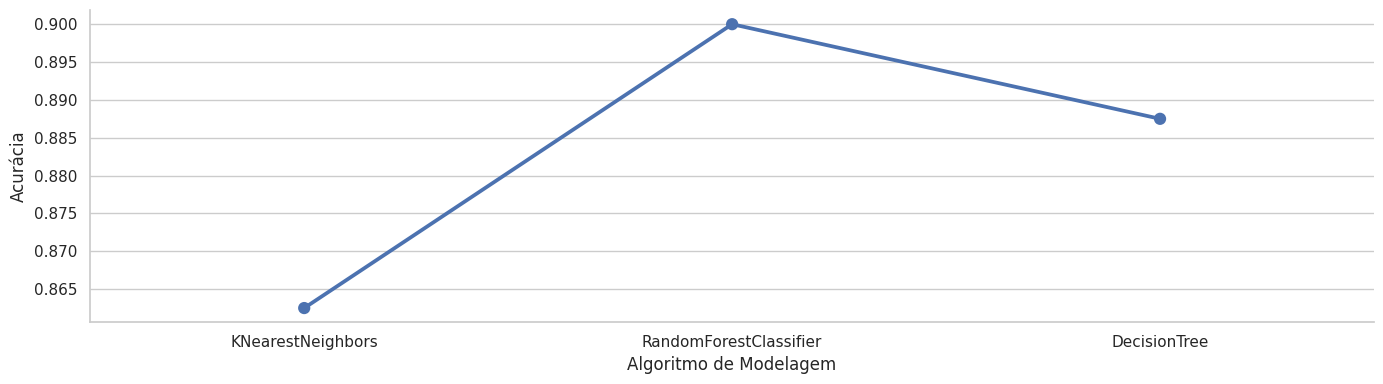

In [151]:
sns.catplot(x='Algoritmo de Modelagem',y='Acurácia',data=acuracias_frame, kind='point', height=4, aspect=3.5)

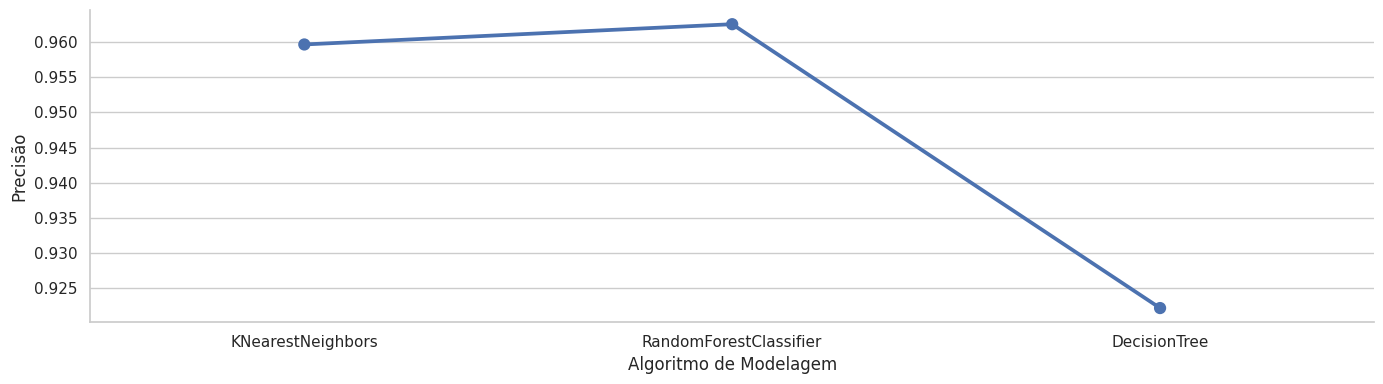

In [152]:
sns.catplot(x='Algoritmo de Modelagem',y='Precisão',data=acuracias_frame, kind='point', height=4, aspect=3.5)

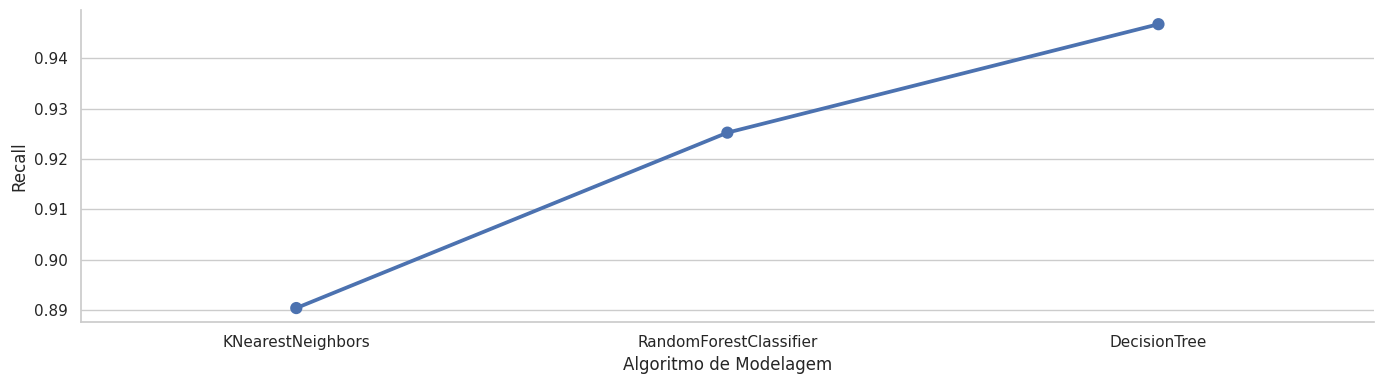

In [153]:
sns.catplot(x='Algoritmo de Modelagem',y='Recall',data=acuracias_frame, kind='point', height=4, aspect=3.5)

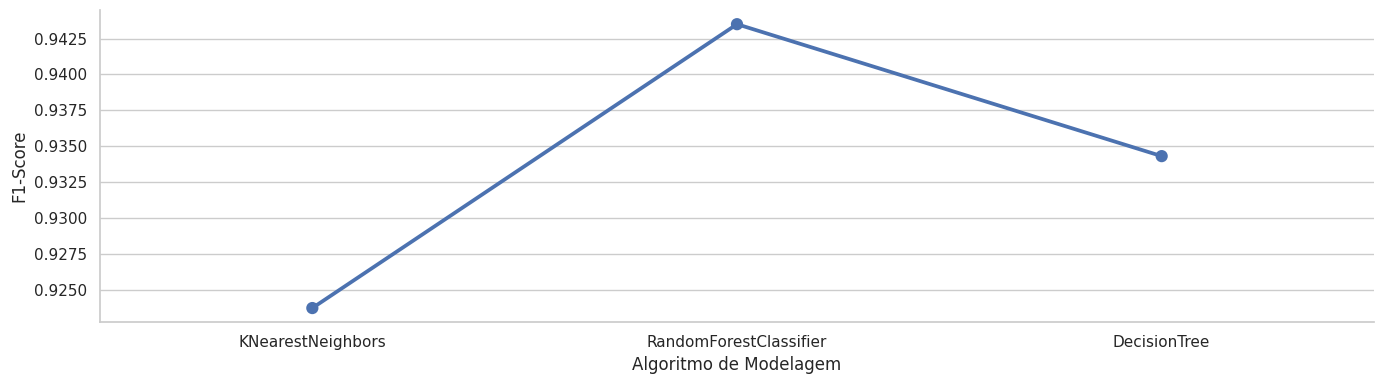

In [154]:
sns.catplot(x='Algoritmo de Modelagem',y='F1-Score',data=acuracias_frame, kind='point', height=4, aspect=3.5)

No contexto da análise de dados, é importante notar que, inicialmente, as características não foram submetidas a nenhum tipo de escala. Isso significa que essas características têm diferentes escalas, o que implica que seus valores estão em intervalos ou unidades distintas. Agora, com o objetivo de entender melhor o impacto disso, a próxima etapa é realizar a escala das características. O escalonamento de características é uma prática comum em ciência de dados, utilizada para padronizar as características em uma escala uniforme. Essa ação visa avaliar como essa padronização afeta os resultados e o desempenho do modelo ou da análise em questão.

In [155]:
def avaliar_modelos(x_treino, x_teste, y_treino, y_teste, nome_escalonador):
    modelos = [KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier()]
    acuracias_frame[f'Acuracia_{nome_escalonador}'] = np.array([accuracy_score(model.fit(x_treino, y_treino).predict(x_teste), y_teste) for model in modelos])
    acuracias_frame[f'Precisao_{nome_escalonador}'] = np.array([precision_score(model.fit(x_treino, y_treino).predict(x_teste), y_teste) for model in modelos])
    acuracias_frame[f'Recall_{nome_escalonador}'] = np.array([recall_score(model.fit(x_treino, y_treino).predict(x_teste), y_teste) for model in modelos])
    acuracias_frame[f'F1Score_{nome_escalonador}'] = np.array([f1_score(model.fit(x_treino, y_treino).predict(x_teste), y_teste) for model in modelos])

escaladores = [MinMaxScaler(), StandardScaler()]
nomes_escalonadores = ['Min_Max_Scaler', 'Standard_Scaler']

for escala in range(len(escaladores)):
    escalador = escaladores[escala]
    escalador.fit(df)
    df_escalado = escalador.transform(df)
    X = df_escalado[:, 0:6]
    x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size=0.25, random_state=42)
    avaliar_modelos(x_treino, x_teste, y_treino, y_teste, nomes_escalonadores[escala])


## Escalonamento dos dados

Vamos avaliar como diferentes técnicas de escalonamento afetam o desempenho de modelos de classificação.

Utilizando a função `avaliar_modelos`, o código examina vários modelos de classificação em dados de treinamento e teste, fornecendo resultados que permitem a comparação do desempenho desses modelos após a aplicação de técnicas de escalonamento, como Min-Max Scaling e Standard Scaling.

Esse processo é fundamental para determinar qual abordagem de pré-processamento de dados é mais eficaz na otimização do desempenho dos modelos.

In [156]:
acuracias_frame

,Algoritmo de Modelagem,Acurácia,Precisão,Recall,F1-Score,Acuracia_Min_Max_Scaler,Precisao_Min_Max_Scaler,Recall_Min_Max_Scaler,F1Score_Min_Max_Scaler,Acuracia_Standard_Scaler,Precisao_Standard_Scaler,Recall_Standard_Scaler,F1Score_Standard_Scaler
0,KNearestNeighbors,0.8625,0.959654,0.890374,0.923717,0.8725,0.965418,0.895722,0.929265,0.8725,0.956772,0.902174,0.928671
1,RandomForestClassifier,0.9000,0.962536,0.925208,0.943503,0.8950,0.965418,0.911051,0.945607,0.9025,0.979827,0.920981,0.938719
2,DecisionTree,0.8875,0.922190,0.946746,0.934307,0.8300,0.870317,0.915408,0.893491,0.8325,0.884726,0.923547,0.895434


**Observações:**

1. As precisões aumentam marginalmente ao realizar o escalonamento.

2. O StandardScaling parece proporcionar resultados ligeiramente superiores em comparação com o MinMaxScaling.

- Portanto o Standart Scaler foi o método escolhido.

In [157]:
Y = df['qualidade'].to_numpy()
escalador = StandardScaler()
df_escalado = escalador.fit_transform(df)
X = df_escalado[:, 0:11]
Y = df['qualidade'].to_numpy()
x_treino, x_teste, y_treino, y_teste, = train_test_split(
    X, Y, test_size=0.25, random_state=42)



# Avaliação dos modelos através de matrizes de confusão

###   1. KNN

In [158]:
lista_vizinhos = [i + 1 for i in range(100)]
parametros_knn = {'n_neighbors': lista_vizinhos,
                  'weights': ['uniform', 'distance']}

classificadores = {}

for score in ['accuracy', 'balanced_accuracy', 'average_precision', 'roc_auc']:
    classificador = GridSearchCV(estimator=KNeighborsClassifier(
    ), param_grid=parametros_knn, scoring=score, cv=10)
    classificador.fit(x_treino, y_treino)
    previsoes = classificador.predict(x_teste)
    previsoes_treino = classificador.predict(x_treino)

    print(f'KNN - {score.capitalize()}: Best Params: {classificador.best_params_} e Best Score: {classificador.best_score_:.4f}')
    print(f'KNN - {score.capitalize()}: Accuracy Score teste: {accuracy_score(previsoes, y_teste):.4f} e {score.capitalize()}: Accuracy Score treino: {accuracy_score(previsoes_treino, y_treino):.4f}')
    print(f'KNN - {score.capitalize()}: Precision Score teste: {precision_score(previsoes, y_teste):.4f} e {score.capitalize()}: Precision Score treino: {precision_score(previsoes_treino, y_treino):.4f}')
    print(f'KNN - {score.capitalize()}: Recall Score teste: {recall_score(previsoes, y_teste):.4f} e {score.capitalize()}: Recall Score treino: {recall_score(previsoes_treino, y_treino):.4f}')
    print(f'KNN - {score.capitalize()}: F1-Score Score teste: {f1_score(previsoes, y_teste):.4f} e {score.capitalize()}: F1-Score Score treino: {f1_score(previsoes_treino, y_treino):.4f}\n')

    classificadores[score] = classificador


KNN - Accuracy: Best Params: {'n_neighbors': 66, 'weights': 'distance'} e Best Score: 0.9100
KNN - Accuracy: Accuracy Score teste: 0.9075 e Accuracy: Accuracy Score treino: 1.0000
KNN - Accuracy: Precision Score teste: 0.9827 e Accuracy: Precision Score treino: 1.0000
KNN - Accuracy: Recall Score teste: 0.9167 e Accuracy: Recall Score treino: 1.0000
KNN - Accuracy: F1-Score Score teste: 0.9485 e Accuracy: F1-Score Score treino: 1.0000

KNN - Balanced_accuracy: Best Params: {'n_neighbors': 2, 'weights': 'uniform'} e Best Score: 0.7749
KNN - Balanced_accuracy: Accuracy Score teste: 0.8325 e Balanced_accuracy: Accuracy Score treino: 0.9408
KNN - Balanced_accuracy: Precision Score teste: 0.8386 e Balanced_accuracy: Precision Score treino: 0.9314
KNN - Balanced_accuracy: Recall Score teste: 0.9636 e Balanced_accuracy: Recall Score treino: 1.0000
KNN - Balanced_accuracy: F1-Score Score teste: 0.8968 e Balanced_accuracy: F1-Score Score treino: 0.9645

KNN - Average_precision: Best Params: {'n

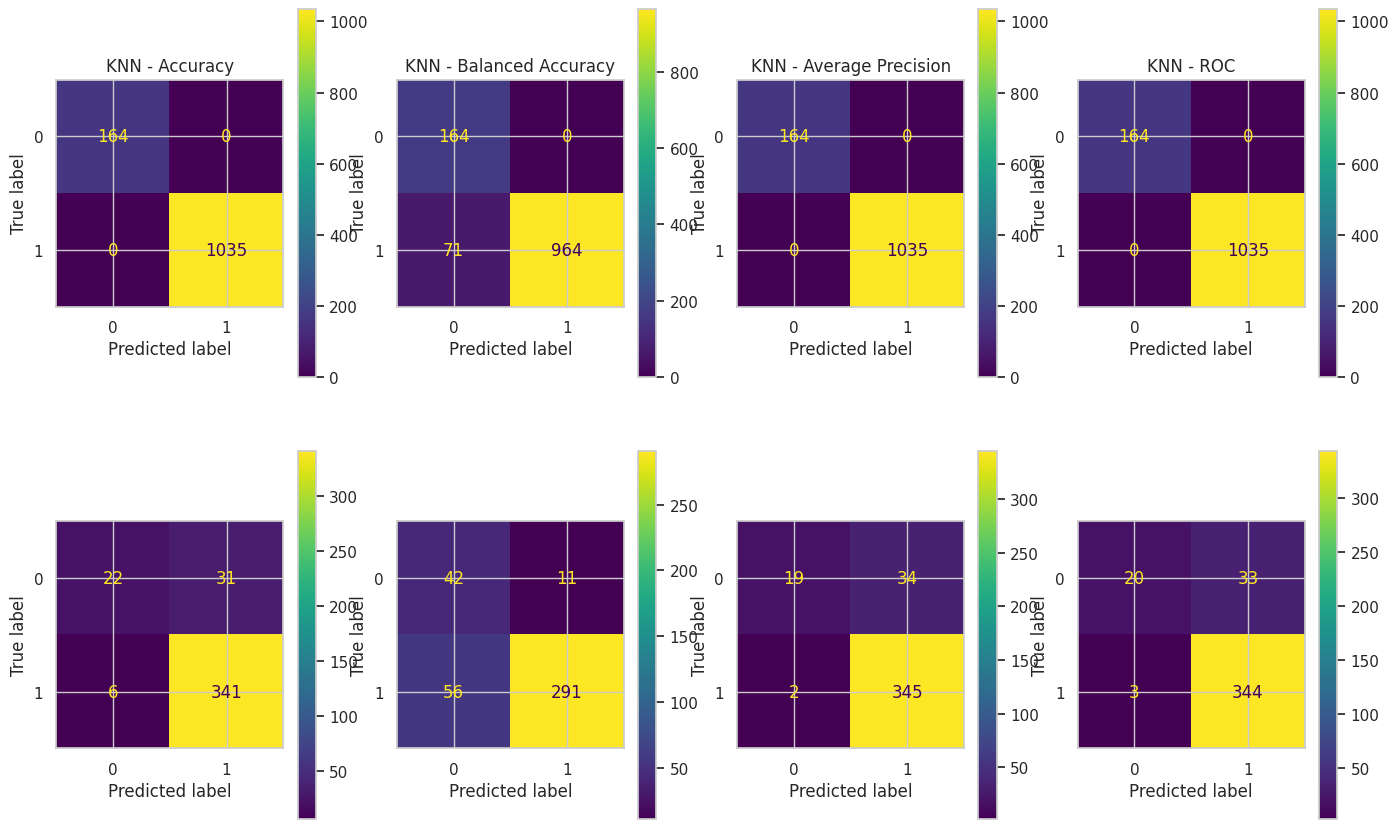

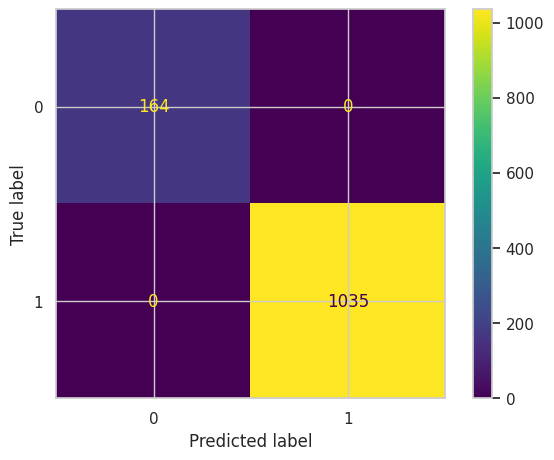

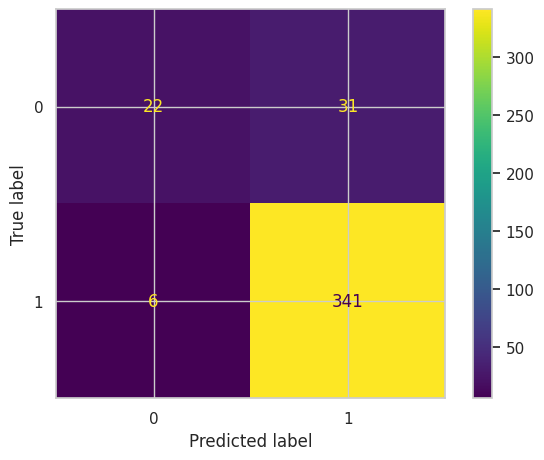

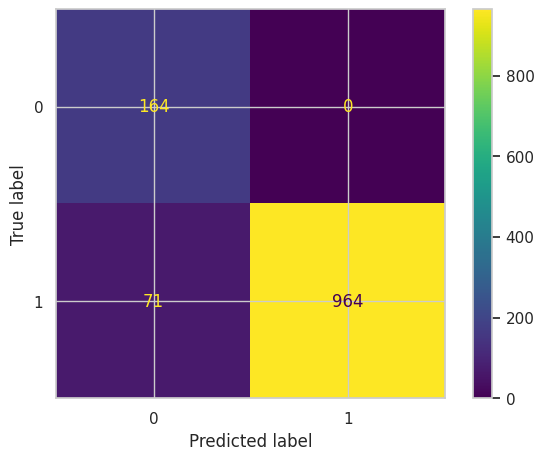

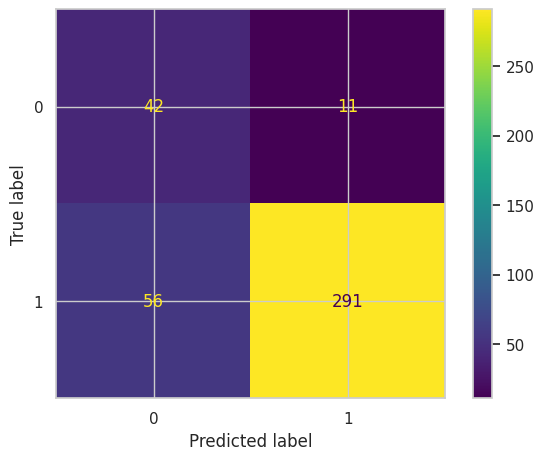

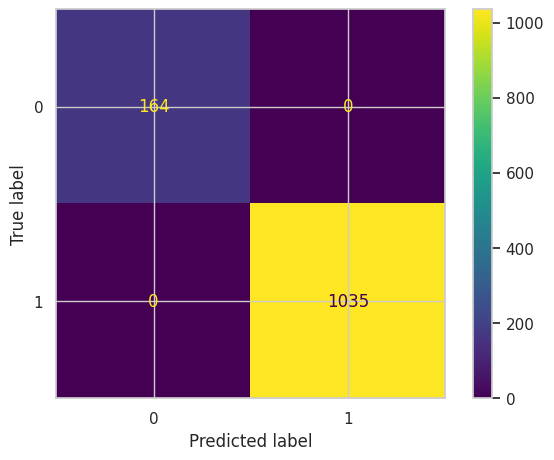

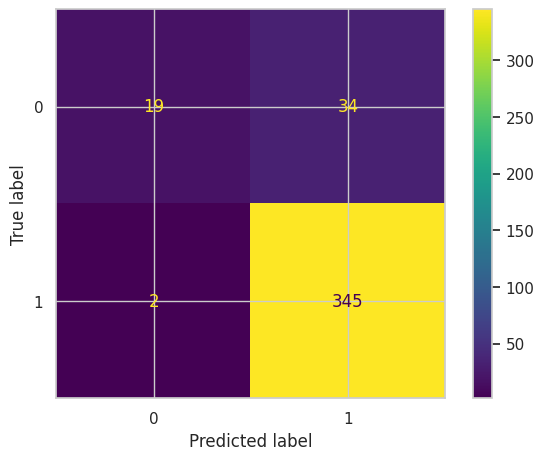

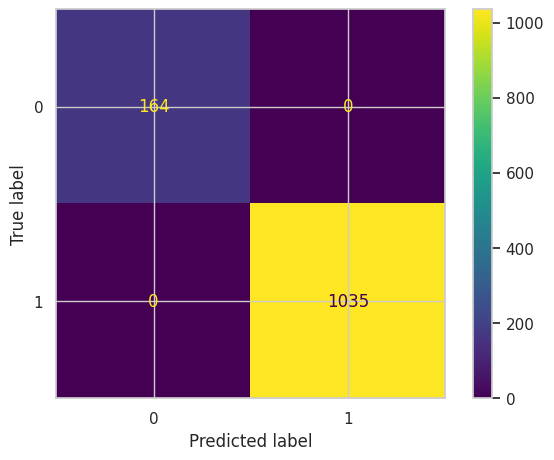

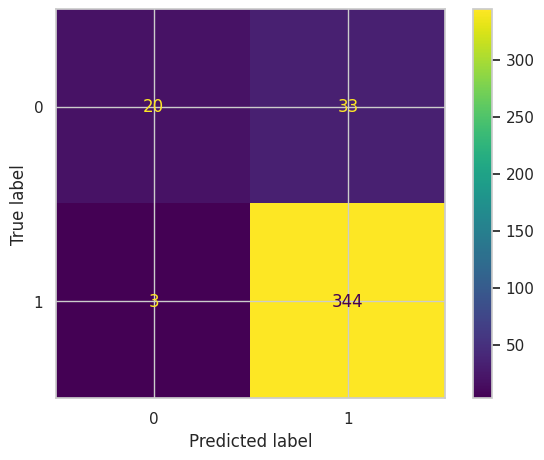

In [161]:
fig,axs = plt.subplots(nrows = 2, ncols = 4, figsize = (15,10))

axs[0,0].set_title("KNN - Accuracy")
axs[0,1].set_title("KNN - Balanced Accuracy")
axs[0,2].set_title("KNN - Average Precision")
axs[0,3].set_title("KNN - ROC")

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_acc_treino).plot(ax = axs[0,0])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_acc).plot(ax = axs[1,0])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_bacc_treino).plot(ax = axs[0,1])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_bacc).plot(ax = axs[1,1])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_avp_treino).plot(ax = axs[0,2])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_avp).plot(ax = axs[1,2])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_roc_treino).plot(ax = axs[0,3])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_roc).plot(ax = axs[1,3])
plt.show()

Então observamos que o KNN parece overfitar em todas as combinações de hiperparâmetros que fizemos.

###   2. Decision Tree

In [ ]:

parametros_dt = {'max_depth': range(1, 8)}


classificador_dt_acc = GridSearchCV(estimator=DecisionTreeClassifier(),
                                    param_grid=parametros_dt,
                                    scoring='accuracy',
                                    cv=10)

classificador_dt_bacc = GridSearchCV(estimator=DecisionTreeClassifier(),
                                     param_grid=parametros_dt,
                                     scoring='balanced_accuracy',
                                     cv=10)

classificador_dt_avp = GridSearchCV(estimator=DecisionTreeClassifier(),
                                    param_grid=parametros_dt,
                                    scoring='average_precision',
                                    cv=10)

classificador_dt_roc = GridSearchCV(estimator=DecisionTreeClassifier(),
                                    param_grid=parametros_dt,
                                    scoring='roc_auc',
                                    cv=10)


classificador_dt_acc.fit(x_treino, y_treino)
classificador_dt_bacc.fit(x_treino, y_treino)
classificador_dt_avp.fit(x_treino, y_treino)
classificador_dt_roc.fit(x_treino, y_treino)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 8)}, scoring='roc_auc')

In [ ]:
print(f'DT - Accuracy: Best Params: {classificador_dt_acc.best_params_}  e Best Score: {classificador_dt_acc.best_score_}')

print(f'DT - Balanced Accuracy: Best Params: {classificador_dt_bacc.best_params_}  e Best Score: {classificador_dt_bacc.best_score_}')

print(f'DT - average precision: Best Params: {classificador_dt_avp.best_params_}  e Best Score: {classificador_dt_avp.best_score_}')

print(f'DT - ROC : Best Params: {classificador_dt_roc.best_params_}  e Best Score: {classificador_dt_roc.best_score_}')


DT - Accuracy: Best Params: {'max_depth': 3}  e Best Score: 0.8866036414565827
DT - Balanced Accuracy: Best Params: {'max_depth': 7}  e Best Score: 0.7117095176382726
DT - average precision: Best Params: {'max_depth': 3}  e Best Score: 0.9544814497076995
DT - ROC : Best Params: {'max_depth': 4}  e Best Score: 0.8235784393807932


In [ ]:

previsoes_dt_acc = classificador_dt_acc.predict(x_teste)
previsoes_dt_bacc = classificador_dt_bacc.predict(x_teste)
previsoes_dt_avp = classificador_dt_avp.predict(x_teste)
previsoes_dt_roc = classificador_dt_roc.predict(x_teste)

previsoes_dt_acc_treino = classificador_dt_acc.predict(x_treino)
previsoes_dt_bacc_treino = classificador_dt_bacc.predict(x_treino)
previsoes_dt_avp_treino = classificador_dt_avp.predict(x_treino)
previsoes_dt_roc_treino = classificador_dt_roc.predict(x_treino)


print(f'DT - Accuracy: Accuracy Score: {accuracy_score(previsoes_dt_acc, y_teste)}  e Accuracy: Accuracy Score TREINO: {accuracy_score(previsoes_dt_acc_treino, y_treino)}')
print(f'DT - Accuracy: Precision Score: {precision_score(previsoes_dt_acc, y_teste)}  e Accuracy: Precision Score TREINO: {precision_score(previsoes_dt_acc_treino, y_treino)}')
print(f'DT - Accuracy: Recall Score: {recall_score(previsoes_dt_acc, y_teste)}  e Accuracy: Recall Score TREINO: {recall_score(previsoes_dt_acc_treino, y_treino)}')
print(f'DT - Accuracy: F1-Score Score: {f1_score(previsoes_dt_acc, y_teste)}  e Accuracy: F1-Score Score TREINO: {f1_score(previsoes_dt_acc_treino, y_treino)}')
print("\n")
print(f'DT - Balanced Accuracy: Accuracy Score: {accuracy_score(previsoes_dt_bacc, y_teste)} e Balanced Accuracy: Accuracy Score TREINO: {accuracy_score(previsoes_dt_bacc_treino, y_treino)}')
print(f'DT - Balanced Accuracy: Precision Score: {precision_score(previsoes_dt_bacc, y_teste)}  e Balanced Accuracy: Precision Score TREINO: {precision_score(previsoes_dt_bacc_treino, y_treino)}')
print(f'DT - Balanced Accuracy: Recall Score: {recall_score(previsoes_dt_bacc, y_teste)}  e Balanced Accuracy: Recall Score TREINO: {recall_score(previsoes_dt_bacc_treino, y_treino)}')
print(f'DT - Balanced Accuracy: F1-Score Score: {f1_score(previsoes_dt_bacc, y_teste)}  e Balanced Accuracy: F1-Score Score TREINO: {f1_score(previsoes_dt_bacc_treino, y_treino)}')
print("\n")
print(f'DT - Average Precision: Accuracy Score: {accuracy_score(previsoes_dt_avp, y_teste)}  e Average Precision: Accuracy Score TREINO: {accuracy_score(previsoes_dt_avp_treino, y_treino)}')
print(f'DT - Average Precision: Precision Score: {precision_score(previsoes_dt_avp, y_teste)}  e Average Precision: Precision Score TREINO: {precision_score(previsoes_dt_avp_treino, y_treino)}')
print(f'DT - Average Precision: Recall Score: {recall_score(previsoes_dt_avp, y_teste)}  e Average Precision: Recall Score TREINO: {recall_score(previsoes_dt_avp_treino, y_treino)}')
print(f'DT - Average Precision: F1-Score Score: {f1_score(previsoes_dt_avp, y_teste)}  e Average Precision: F1-Score Score TREINO: {f1_score(previsoes_dt_avp_treino, y_treino)}')
print("\n")
print(f'DT - ROC : Accuracy Score: {accuracy_score(previsoes_dt_roc, y_teste)} e ROC : Accuracy Score TREINO: {accuracy_score(previsoes_dt_roc_treino, y_treino)}')
print(f'DT - ROC: Precision Score: {precision_score(previsoes_dt_roc, y_teste)}  e ROC: Precision Score TREINO: {precision_score(previsoes_dt_roc_treino, y_treino)}')
print(f'DT - ROC: Recall Score: {recall_score(previsoes_dt_roc, y_teste)}  e ROC: Recall Score TREINO: {recall_score(previsoes_dt_roc_treino, y_treino)}')
print(f'DT - ROC: F1-Score Score: {f1_score(previsoes_dt_roc, y_teste)}  e ROC: F1-Score Score TREINO: {f1_score(previsoes_dt_roc_treino, y_treino)}')


DT - Accuracy: Accuracy Score: 0.8825  e Accuracy: Accuracy Score TREINO: 0.902418682235196
DT - Accuracy: Precision Score: 0.968299711815562  e Accuracy: Precision Score TREINO: 0.9748792270531401
DT - Accuracy: Recall Score: 0.9032258064516129  e Accuracy: Recall Score TREINO: 0.9172727272727272
DT - Accuracy: F1-Score Score: 0.9346314325452016  e Accuracy: F1-Score Score TREINO: 0.9451990632318502


DT - Balanced Accuracy: Accuracy Score: 0.8675 e Balanced Accuracy: Accuracy Score TREINO: 0.9499582985821518
DT - Balanced Accuracy: Precision Score: 0.9337175792507204  e Balanced Accuracy: Precision Score TREINO: 0.9903381642512077
DT - Balanced Accuracy: Recall Score: 0.9152542372881356  e Balanced Accuracy: Recall Score TREINO: 0.9534883720930233
DT - Balanced Accuracy: F1-Score Score: 0.9243937232524964  e Balanced Accuracy: F1-Score Score TREINO: 0.9715639810426541


DT - Average Precision: Accuracy Score: 0.8825  e Average Precision: Accuracy Score TREINO: 0.902418682235196
DT - 

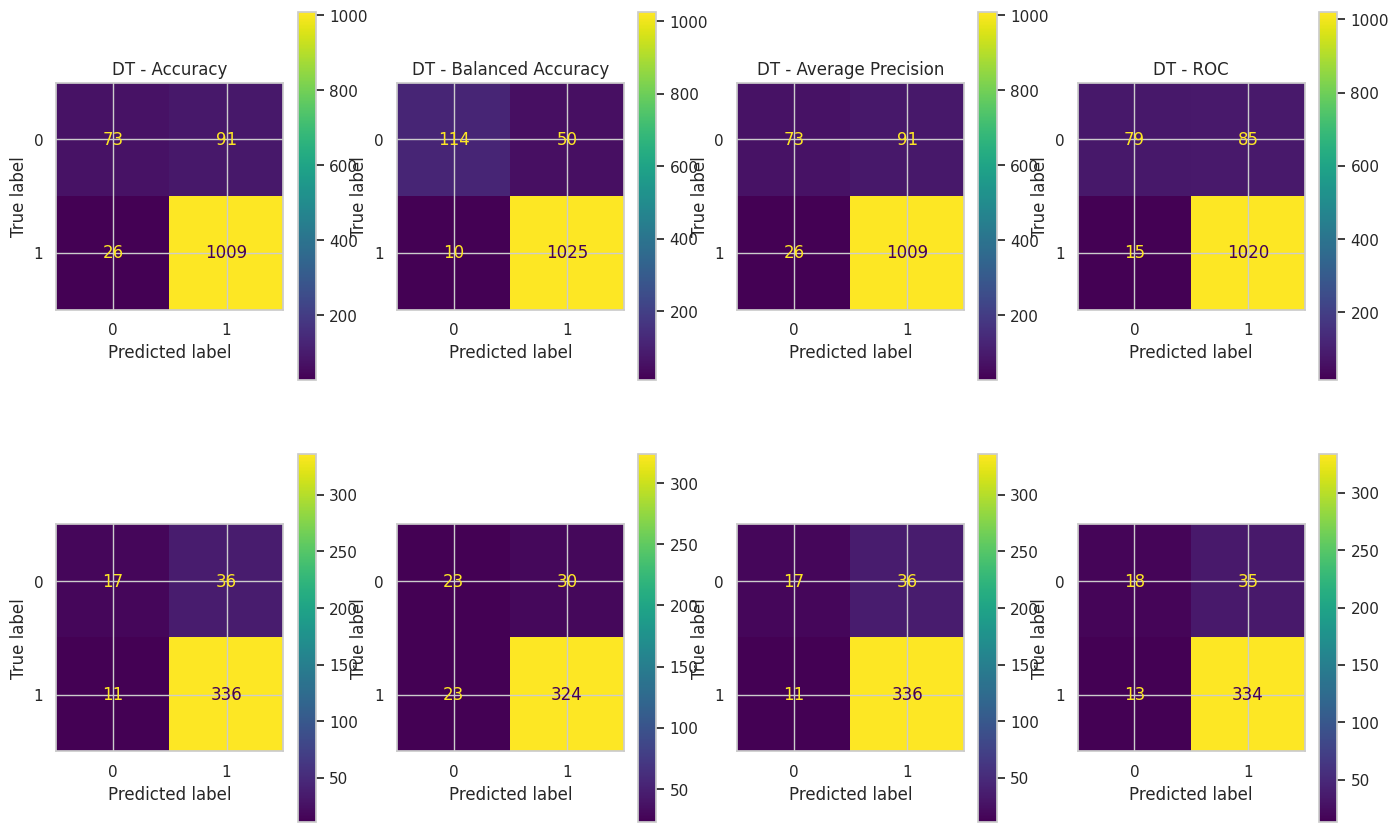

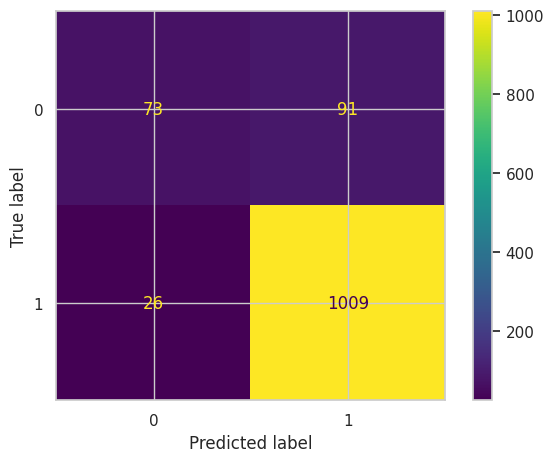

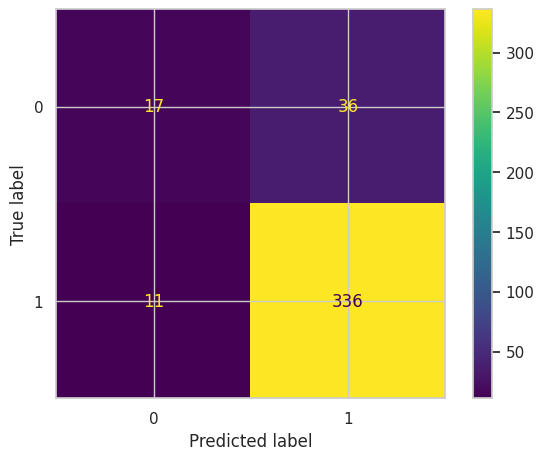

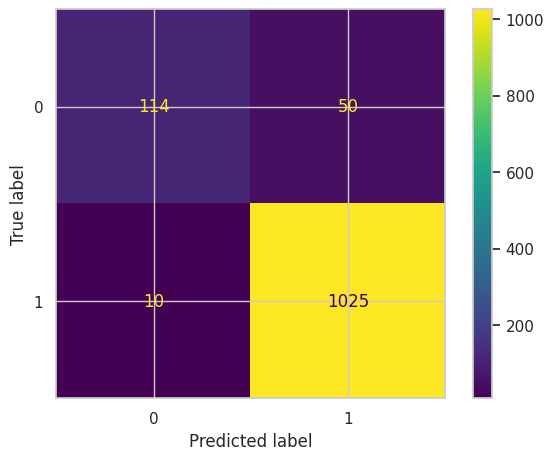

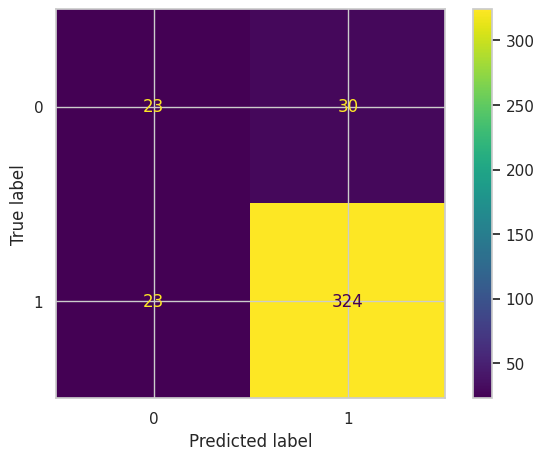

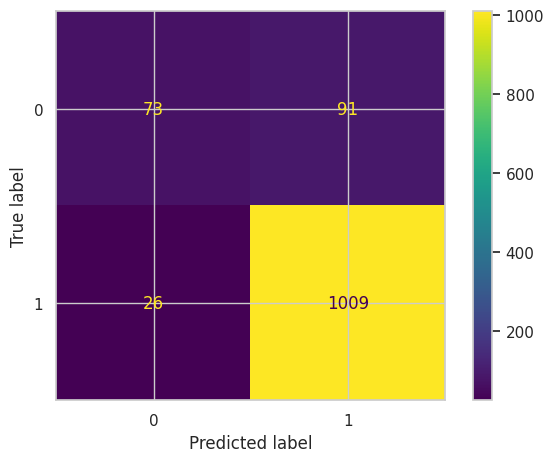

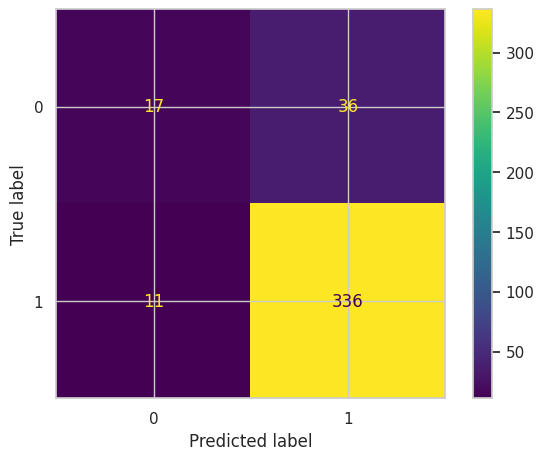

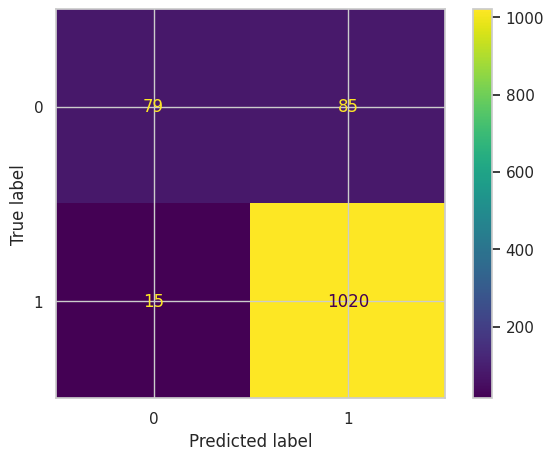

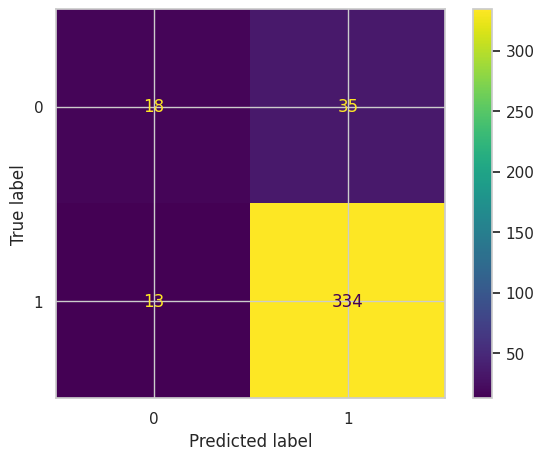

In [ ]:
fig,axs = plt.subplots(nrows = 2, ncols = 4, figsize = (15,10))

axs[0,0].set_title("DT - Accuracy")
axs[0,1].set_title("DT - Balanced Accuracy")
axs[0,2].set_title("DT - Average Precision")
axs[0,3].set_title("DT - ROC")

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_dt_acc_treino).plot(ax = axs[0,0])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_dt_acc).plot(ax = axs[1,0])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_dt_bacc_treino).plot(ax = axs[0,1])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_dt_bacc).plot(ax = axs[1,1])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_dt_avp_treino).plot(ax = axs[0,2])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_dt_avp).plot(ax = axs[1,2])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_dt_roc_treino).plot(ax = axs[0,3])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_dt_roc).plot(ax = axs[1,3])
plt.show()

###   3. RANDOM FOREST

In [ ]:


parametros_rf = {'max_depth': range(1, 8)}


classificador_rf_acc = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                                    param_grid=parametros_rf,
                                    scoring='accuracy',
                                    cv=10)

classificador_rf_bacc = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                                     param_grid=parametros_rf,
                                     scoring='balanced_accuracy',
                                     cv=10)

classificador_rf_avp = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                                    param_grid=parametros_rf,
                                    scoring='average_precision',
                                    cv=10)

classificador_rf_roc = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                                    param_grid=parametros_rf,
                                    scoring='roc_auc',
                                    cv=10)


classificador_rf_acc.fit(x_treino, y_treino)
classificador_rf_bacc.fit(x_treino, y_treino)
classificador_rf_avp.fit(x_treino, y_treino)
classificador_rf_roc.fit(x_treino, y_treino)


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': range(1, 8)}, scoring='roc_auc')

In [ ]:
print(f'RF - Accuracy: Best Params: {classificador_rf_acc.best_params_}  e Best Score: {classificador_rf_acc.best_score_}')

print(f'RF - Balanced Accuracy: Best Params: {classificador_rf_bacc.best_params_}  e Best Score: {classificador_rf_bacc.best_score_}')

print(f'RF - average precision: Best Params: {classificador_rf_avp.best_params_}  e Best Score: {classificador_rf_avp.best_score_}')

print(f'RF - ROC : Best Params: {classificador_rf_roc.best_params_}  e Best Score: {classificador_rf_roc.best_score_}')


RF - Accuracy: Best Params: {'max_depth': 7}  e Best Score: 0.8991106442577032
RF - Balanced Accuracy: Best Params: {'max_depth': 7}  e Best Score: 0.6800250131792822
RF - average precision: Best Params: {'max_depth': 7}  e Best Score: 0.9810359685163867
RF - ROC : Best Params: {'max_depth': 7}  e Best Score: 0.9061482724157626


In [ ]:

previsoes_rf_acc = classificador_rf_acc.predict(x_teste)
previsoes_rf_bacc = classificador_rf_bacc.predict(x_teste)
previsoes_rf_avp = classificador_rf_avp.predict(x_teste)
previsoes_rf_roc = classificador_rf_roc.predict(x_teste)

previsoes_rf_acc_treino = classificador_rf_acc.predict(x_treino)
previsoes_rf_bacc_treino = classificador_rf_bacc.predict(x_treino)
previsoes_rf_avp_treino = classificador_rf_avp.predict(x_treino)
previsoes_rf_roc_treino = classificador_rf_roc.predict(x_treino)


print(f'RF - Accuracy: Accuracy Score: {accuracy_score(previsoes_rf_acc, y_teste)}  e Accuracy: Accuracy Score TREINO: {accuracy_score(previsoes_rf_acc_treino, y_treino)}')
print(f'RF - Accuracy: Precision Score: {precision_score(previsoes_rf_acc, y_teste)}  e Accuracy: Precision Score TREINO: {precision_score(previsoes_rf_acc_treino, y_treino)}')
print(f'RF - Accuracy: Recall Score: {recall_score(previsoes_rf_acc, y_teste)}  e Accuracy: Recall Score TREINO: {recall_score(previsoes_rf_acc_treino, y_treino)}')
print(f'RF - Accuracy: F1-Score Score: {f1_score(previsoes_rf_acc, y_teste)}  e Accuracy: F1-Score Score TREINO: {f1_score(previsoes_rf_acc_treino, y_treino)}')
print("\n")
print(f'RF - Balanced Accuracy: Accuracy Score: {accuracy_score(previsoes_rf_bacc, y_teste)} e Balanced Accuracy: Accuracy Score TREINO: {accuracy_score(previsoes_rf_bacc_treino, y_treino)}')
print(f'RF - Balanced Accuracy: Precision Score: {precision_score(previsoes_rf_bacc, y_teste)}  e Balanced Accuracy: Precision Score TREINO: {precision_score(previsoes_rf_bacc_treino, y_treino)}')
print(f'RF - Balanced Accuracy: Recall Score: {recall_score(previsoes_rf_bacc, y_teste)}  e Balanced Accuracy: Recall Score TREINO: {recall_score(previsoes_rf_bacc_treino, y_treino)}')
print(f'RF - Balanced Accuracy: F1-Score Score: {f1_score(previsoes_rf_bacc, y_teste)}  e Balanced Accuracy: F1-Score Score TREINO: {f1_score(previsoes_rf_bacc_treino, y_treino)}')
print("\n")
print(f'RF - Average Precision: Accuracy Score: {accuracy_score(previsoes_rf_avp, y_teste)}  e Average Precision: Accuracy Score TREINO: {accuracy_score(previsoes_rf_avp_treino, y_treino)}')
print(f'RF - Average Precision: Precision Score: {precision_score(previsoes_rf_avp, y_teste)}  e Average Precision: Precision Score TREINO: {precision_score(previsoes_rf_avp_treino, y_treino)}')
print(f'RF - Average Precision: Recall Score: {recall_score(previsoes_rf_avp, y_teste)}  e Average Precision: Recall Score TREINO: {recall_score(previsoes_rf_avp_treino, y_treino)}')
print(f'RF - Average Precision: F1-Score Score: {f1_score(previsoes_rf_avp, y_teste)}  e Average Precision: F1-Score Score TREINO: {f1_score(previsoes_rf_avp_treino, y_treino)}')
print("\n")
print(f'RF - ROC : Accuracy Score: {accuracy_score(previsoes_rf_roc, y_teste)} e ROC : Accuracy Score TREINO: {accuracy_score(previsoes_rf_roc_treino, y_treino)}')
print(f'RF - ROC: Precision Score: {precision_score(previsoes_rf_roc, y_teste)}  e ROC: Precision Score TREINO: {precision_score(previsoes_rf_roc_treino, y_treino)}')
print(f'RF - ROC: Recall Score: {recall_score(previsoes_rf_roc, y_teste)}  e ROC: Recall Score TREINO: {recall_score(previsoes_rf_roc_treino, y_treino)}')
print(f'RF - ROC: F1-Score Score: {f1_score(previsoes_rf_roc, y_teste)}  e ROC: F1-Score Score TREINO: {f1_score(previsoes_rf_roc_treino, y_treino)}')


RF - Accuracy: Accuracy Score: 0.8925  e Accuracy: Accuracy Score TREINO: 0.9599666388657214
RF - Accuracy: Precision Score: 0.9711815561959655  e Accuracy: Precision Score TREINO: 1.0
RF - Accuracy: Recall Score: 0.9108108108108108  e Accuracy: Recall Score TREINO: 0.9556786703601108
RF - Accuracy: F1-Score Score: 0.9400278940027893  e Accuracy: F1-Score Score TREINO: 0.9773371104815864


RF - Balanced Accuracy: Accuracy Score: 0.89 e Balanced Accuracy: Accuracy Score TREINO: 0.9616346955796498
RF - Balanced Accuracy: Precision Score: 0.9654178674351584  e Balanced Accuracy: Precision Score TREINO: 0.9980676328502416
RF - Balanced Accuracy: Recall Score: 0.9128065395095368  e Balanced Accuracy: Recall Score TREINO: 0.9591457753017641
RF - Balanced Accuracy: F1-Score Score: 0.938375350140056  e Balanced Accuracy: F1-Score Score TREINO: 0.9782196969696969


RF - Average Precision: Accuracy Score: 0.8875  e Average Precision: Accuracy Score TREINO: 0.9591326105087573
RF - Average Precisi

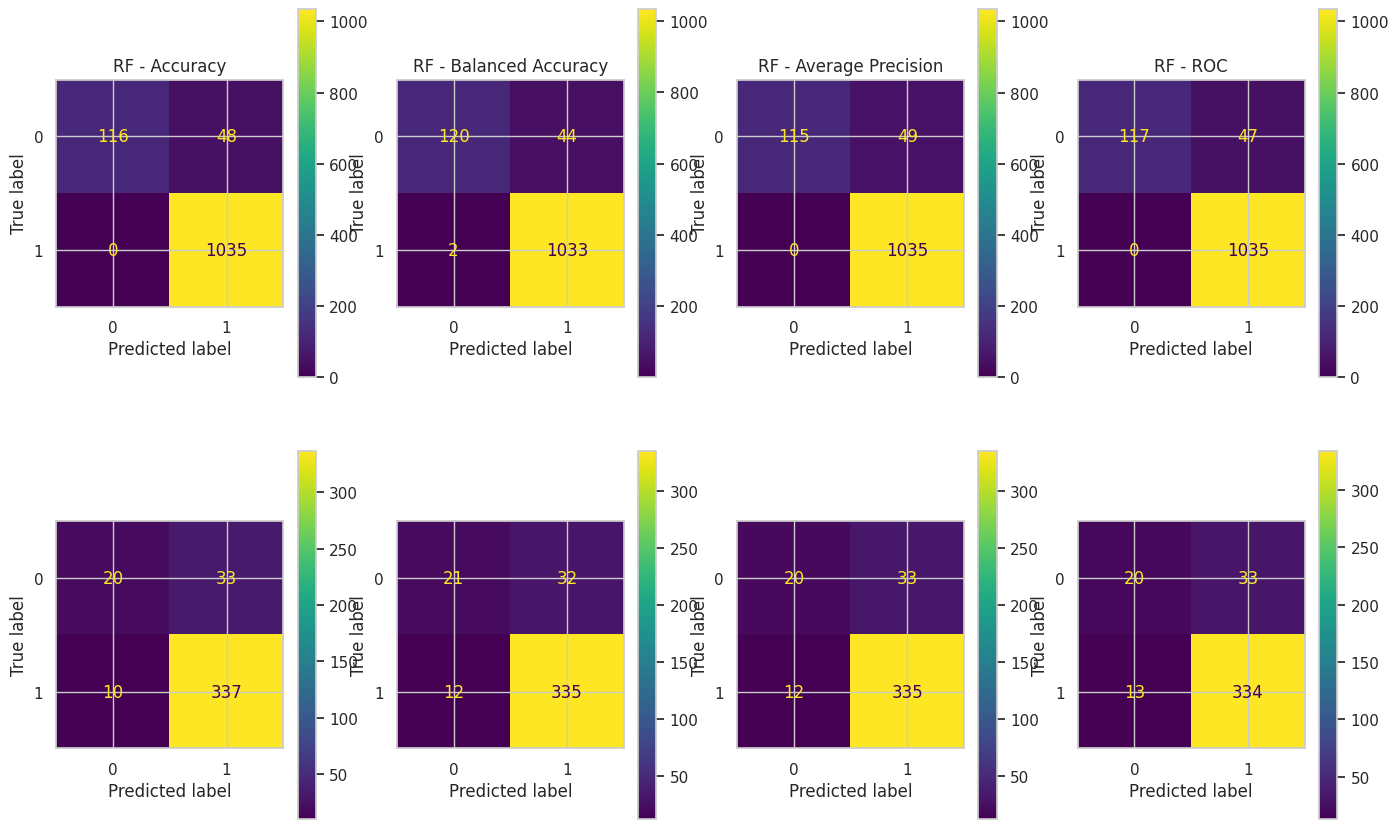

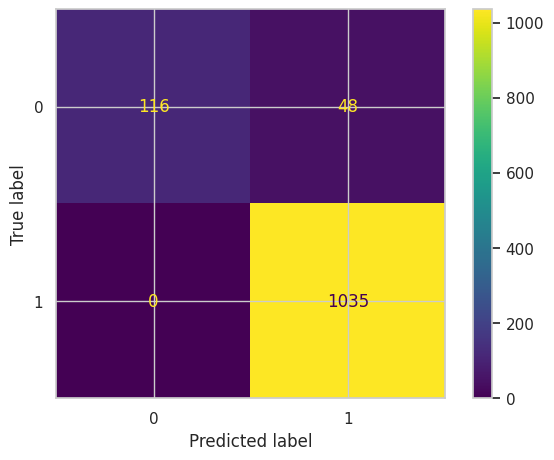

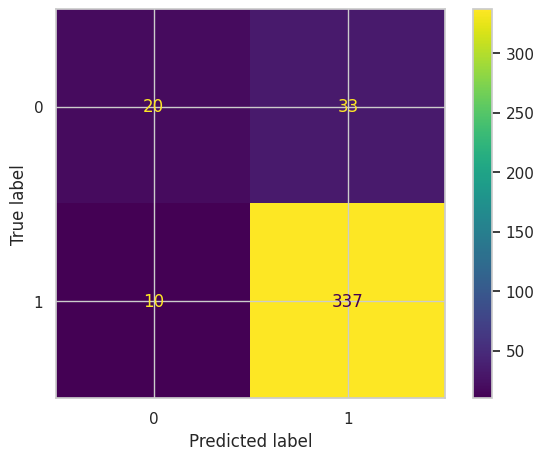

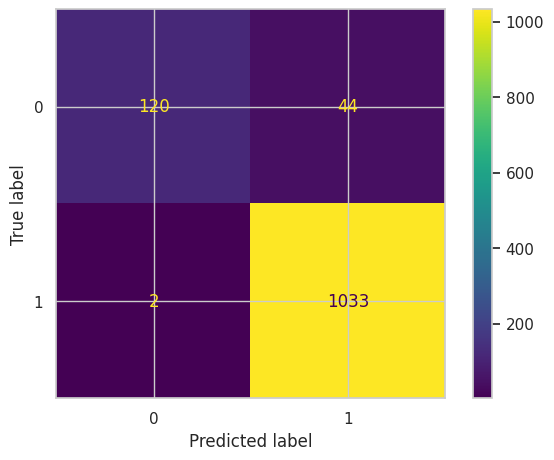

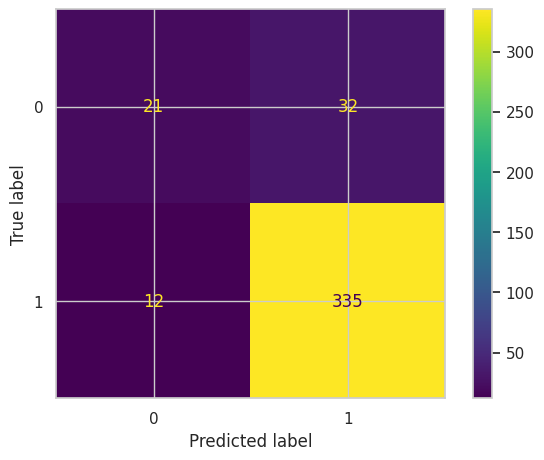

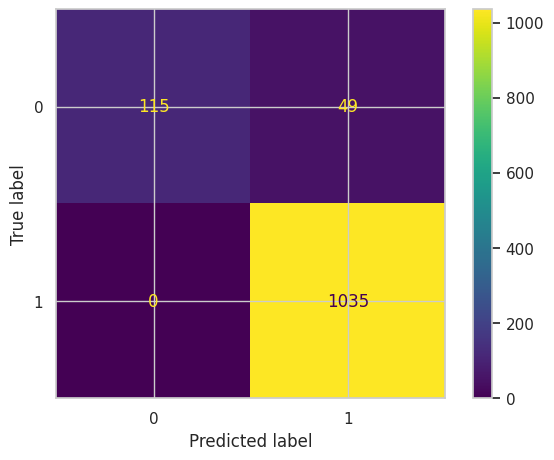

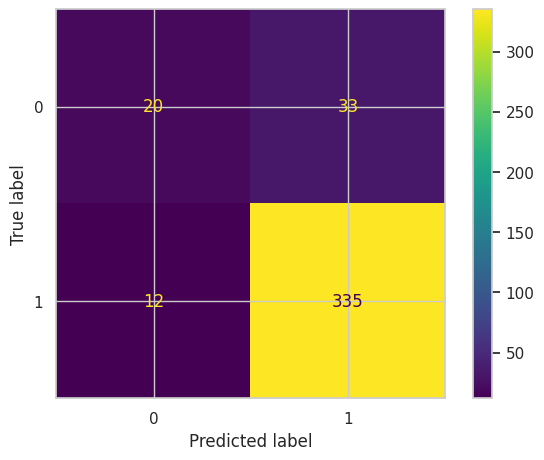

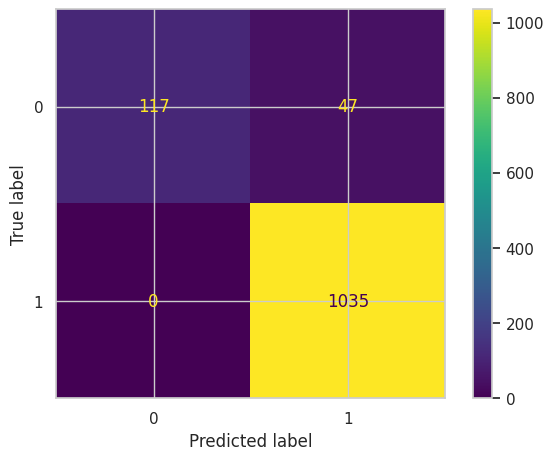

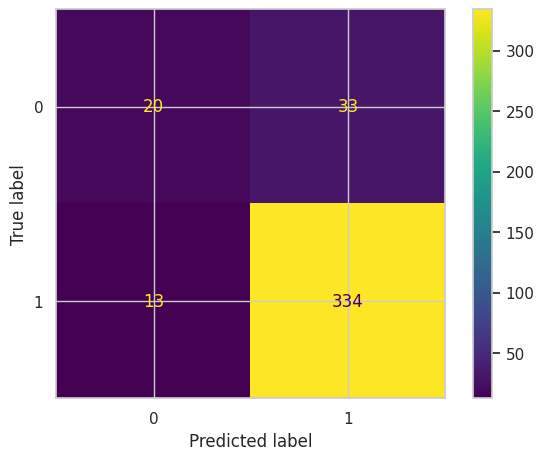

In [ ]:
fig,axs = plt.subplots(nrows = 2, ncols = 4, figsize = (15,10))

axs[0,0].set_title("RF - Accuracy")
axs[0,1].set_title("RF - Balanced Accuracy")
axs[0,2].set_title("RF - Average Precision")
axs[0,3].set_title("RF - ROC")

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_rf_acc_treino).plot(ax = axs[0,0])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_rf_acc).plot(ax = axs[1,0])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_rf_bacc_treino).plot(ax = axs[0,1])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_rf_bacc).plot(ax = axs[1,1])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_rf_avp_treino).plot(ax = axs[0,2])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_rf_avp).plot(ax = axs[1,2])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_rf_roc_treino).plot(ax = axs[0,3])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_rf_roc).plot(ax = axs[1,3])
plt.show()

# Avalição do modelos através da curva R.O.C


In [ ]:
def roc_plot(y_test, y_predict, roc_auc, titulo):


    fpr, tpr, thr = roc_curve(y_test, y_predict)

    roc_display = RocCurveDisplay(fpr = fpr, tpr= tpr, roc_auc = roc_auc).plot()

    plt.title(titulo)
    plt.plot([0,1],[0,1],'g')

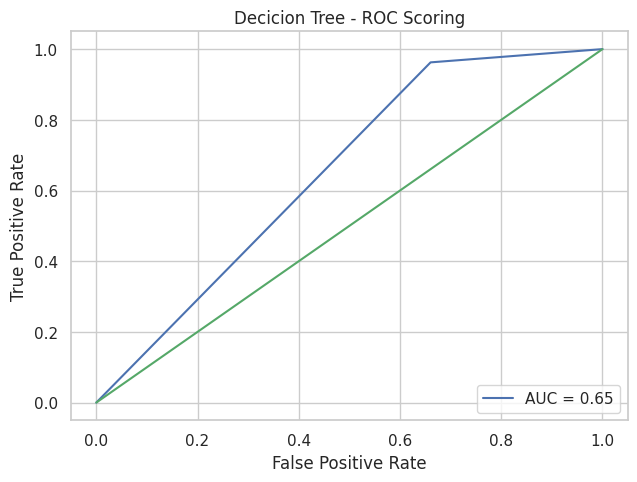

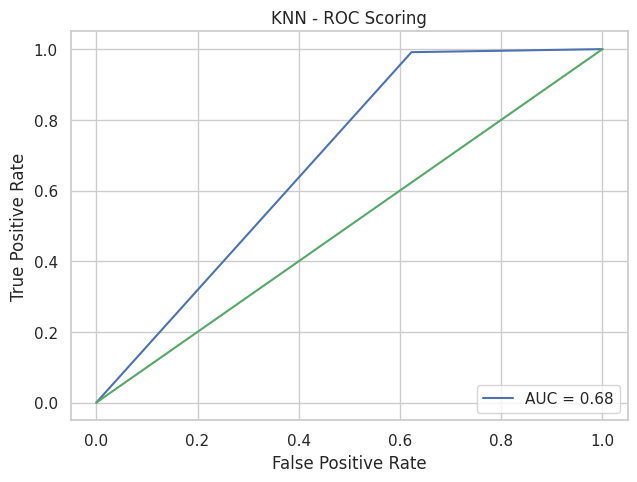

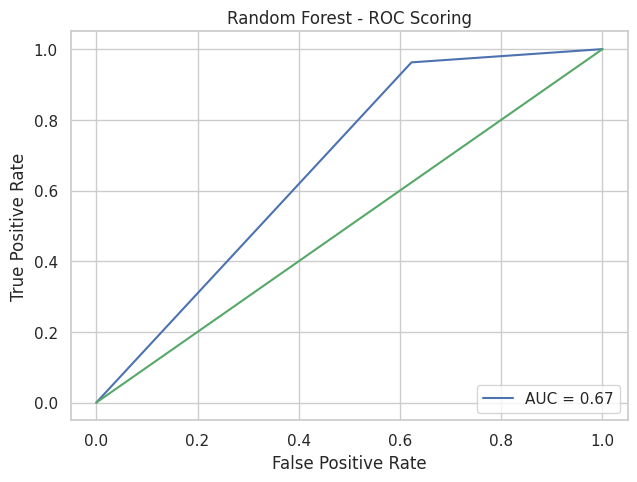

In [ ]:

roc_plot(y_teste, previsoes_dt_roc, roc_auc_score(y_teste, previsoes_dt_roc), 'Decicion Tree - ROC Scoring')

roc_plot(y_teste, previsoes_roc, roc_auc_score(y_teste, previsoes_roc), 'KNN - ROC Scoring')

roc_plot(y_teste, previsoes_rf_roc, roc_auc_score(y_teste, previsoes_rf_roc), 'Random Forest - ROC Scoring')


No teste ROC o modelo com melhor perfomance foi o KNN.

# Conclusão

Em resumo, a construção e avaliação de um modelo de classificação de qualidade de vinhos com duas classes, "Boa" ou "Ruim", utilizando os algoritmos KNN, Decision Tree e Random Forest, demonstrou um desempenho notável, atingindo uma acurácia em torno de 90%. Esse resultado sugere que os modelos são capazes de fazer previsões precisas e confiáveis.

Ao utilzar diferentes métricas, modelos diferentes performaram melhor.

- No caso do KNN - Em termos de previsão do teste, os scorings de acurácia, ROC e precisão média apresentam resultados muito semelhantes, com quantidades de erros e acertos bem próximos, porém seus treinamentos se mostram em um resultado perfeito, caracterizando um overfitting.
Apenas avaliando o scoring de Acurácia média notamos uma proximidade entre os resultados de treino e teste, caracterizando um comportamento mais balanceado, com previsões semelhantes para as duas amostras, o que traz mais confiabilidade ao modelo.

- Random Forest:
Utilizamos como parâmetros do Grid Search a profundidade máxima, que varia entre 1 e 7, e criamos 4 modelos de Grid Search distintos.
Todos os 4 modelos gerados no Grid Search apresentaram resultados bem proximos entre si nas 4 métricas avaliadas. Os resultados do random forest foram um pouco superiores ao de decison tree, mas não tão superiores assim.
Pela matrix de confusão, nota-se que a diagonal principal possui a maior parte dos números, indicando que o modelo apresenta um excelente comportamento. O modelo possui maior facilidade em classificar rótulos ruins do que rótulos bons.

- Decision Tree:
Utilizamos como parâmetros do Grid Search a profundidade máxima, que varia entre 1 e 7, e criamos 4 modelos de Grid Search distintos.Todos os 4 modelos gerados no Grid Search apresentaram resultados bem proximos entre si nas 4 métricas avaliadas. Pela matrix de confusão, nota-se que a diagonal principal possui a maior parte dos números, indicando que o modelo apresenta um excelente comportamento.

- Na análise da curva ROC, o modelo de melhor perfomance foi o KNN.

Em última análise, este trabalho fornece uma base sólida para a classificação de qualidade de vinhos, mas aprimoramentos contínuos e ajustes podem ser explorados para otimizar ainda mais a precisão e a eficácia do modelo.




